## Cafe Sales - dirty datasets


In [75]:
import pandas as pd 
import numpy as np

In [76]:
datasets = pd.read_csv('dirty_cafe_sales.csv')
df = pd.DataFrame(datasets)
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [78]:
df.isnull().sum()

Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

In [79]:
df['Transaction Date'].value_counts()

Transaction Date
UNKNOWN       159
ERROR         142
2023-06-16     40
2023-02-06     40
2023-09-21     39
             ... 
2023-11-24     15
2023-07-30     15
2023-07-22     14
2023-03-11     14
2023-02-17     14
Name: count, Length: 367, dtype: int64

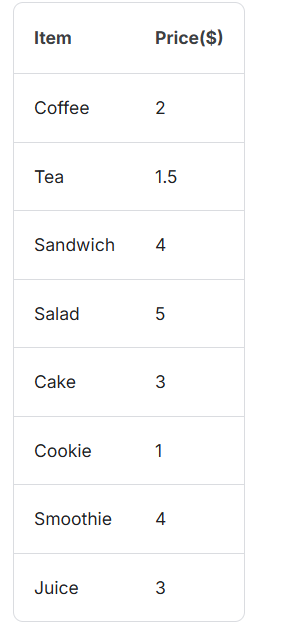

In [80]:
df['Price Per Unit'].value_counts()

Price Per Unit
3.0        2429
4.0        2331
2.0        1227
5.0        1204
1.0        1143
1.5        1133
ERROR       190
UNKNOWN     164
Name: count, dtype: int64

In [81]:
df['Total Spent'].value_counts()

Total Spent
6.0        979
12.0       939
3.0        930
4.0        923
20.0       746
15.0       734
8.0        677
10.0       524
2.0        497
9.0        479
5.0        468
16.0       444
25.0       259
7.5        237
1.0        232
4.5        225
1.5        205
UNKNOWN    165
ERROR      164
Name: count, dtype: int64

In [82]:
df['Quantity'].value_counts()

Quantity
5          2013
2          1974
4          1863
3          1849
1          1822
UNKNOWN     171
ERROR       170
Name: count, dtype: int64

In [86]:
mask = df.isin(['UNKNOWN', 'ERROR']).any(axis=1)

df_error_rows = df[mask]
print(df_error_rows)

     Transaction ID      Item Quantity Price Per Unit Total Spent  \
2       TXN_4271903    Cookie        4            1.0       ERROR   
3       TXN_7034554     Salad        2            5.0        10.0   
6       TXN_4433211   UNKNOWN        3            3.0         9.0   
7       TXN_6699534  Sandwich        4            4.0        16.0   
11      TXN_3051279  Sandwich        2            4.0         8.0   
...             ...       ...      ...            ...         ...   
9985    TXN_3297457      Cake        2            3.0         6.0   
9988    TXN_9594133      Cake        5            3.0         NaN   
9992    TXN_2739140  Smoothie        4            4.0        16.0   
9994    TXN_7851634   UNKNOWN        4            4.0        16.0   
9995    TXN_7672686    Coffee        2            2.0         4.0   

     Payment Method  Location Transaction Date  
2       Credit Card  In-store       2023-07-19  
3           UNKNOWN   UNKNOWN       2023-04-27  
6             ERROR  Tak

In [9]:
error_price = (df['Price Per Unit']  == 'UNKNOWN' ) | (df['Price Per Unit']  == 'ERROR' )
df[error_price]


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
68,TXN_8427104,Salad,2,ERROR,10.0,NaN,In-store,2023-10-27
140,TXN_2484241,Cake,3,UNKNOWN,9.0,Digital Wallet,NaN,2023-07-19
147,TXN_9336980,Salad,4,UNKNOWN,20.0,Cash,In-store,2023-06-06
161,TXN_7965998,Juice,1,UNKNOWN,3.0,Credit Card,In-store,2023-11-02
162,TXN_9238666,Cookie,1,UNKNOWN,1.0,ERROR,Takeaway,2023-07-31
...,...,...,...,...,...,...,...,...
9753,TXN_3507013,Juice,1,ERROR,3.0,Digital Wallet,In-store,2023-01-16
9755,TXN_3092390,Sandwich,3,UNKNOWN,12.0,NaN,In-store,2023-07-24
9796,TXN_8191202,Cookie,2,UNKNOWN,2.0,Digital Wallet,In-store,2023-01-14
9926,TXN_2464706,Cake,4,UNKNOWN,12.0,Digital Wallet,Takeaway,2023-11-09


In [10]:
give_price = df[error_price].replace(['UNKNOWN','ERROR'],None)

In [11]:
give_price

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
68,TXN_8427104,Salad,2,None,10.0,NaN,In-store,2023-10-27
140,TXN_2484241,Cake,3,None,9.0,Digital Wallet,NaN,2023-07-19
147,TXN_9336980,Salad,4,None,20.0,Cash,In-store,2023-06-06
161,TXN_7965998,Juice,1,None,3.0,Credit Card,In-store,2023-11-02
162,TXN_9238666,Cookie,1,None,1.0,None,Takeaway,2023-07-31
...,...,...,...,...,...,...,...,...
9753,TXN_3507013,Juice,1,None,3.0,Digital Wallet,In-store,2023-01-16
9755,TXN_3092390,Sandwich,3,None,12.0,NaN,In-store,2023-07-24
9796,TXN_8191202,Cookie,2,None,2.0,Digital Wallet,In-store,2023-01-14
9926,TXN_2464706,Cake,4,None,12.0,Digital Wallet,Takeaway,2023-11-09


In [12]:
give_price.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354 entries, 68 to 9961
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    354 non-null    object
 1   Item              321 non-null    object
 2   Quantity          343 non-null    object
 3   Price Per Unit    0 non-null      object
 4   Total Spent       339 non-null    object
 5   Payment Method    242 non-null    object
 6   Location          212 non-null    object
 7   Transaction Date  341 non-null    object
dtypes: object(8)
memory usage: 24.9+ KB


In [13]:
def tally_price(item):
    if item == 'Coffee':
        return 2
    elif item == 'Tea':
        return 1.5
    elif item == 'Sandwich':
        return 4
    elif item == 'Salad':
        return 5
    elif item == 'Cake':
        return 3
    elif item == 'Cookie':
        return 1
    elif item == 'Smoothie':
        return 4
    elif item == 'Juice':
        return 3
    else:
        return None
    
df['Price Per Unit'] = df['Item'].apply(tally_price)
df



,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2,2.0,4.0,NaN,UNKNOWN,2023-08-30
9996,TXN_9659401,NaN,3,NaN,3.0,Digital Wallet,NaN,2023-06-02
9997,TXN_5255387,Coffee,4,2.0,8.0,Digital Wallet,NaN,2023-03-02
9998,TXN_7695629,Cookie,3,1.0,3.0,Digital Wallet,NaN,2023-12-02


In [14]:
df['Item'].value_counts()

Item
Juice       1171
Coffee      1165
Salad       1148
Cake        1139
Sandwich    1131
Smoothie    1096
Cookie      1092
Tea         1089
UNKNOWN      344
ERROR        292
Name: count, dtype: int64

In [15]:
def tally_item(price):
    if price == 2 :
        return 'Coffee'
    elif price == 1.5:
        return 'Tea'
    elif price == 4:
        return 'Sandwich'
    elif price == 5:
        return 'Salad'
    elif price == 3:
        return 'Cake'
    elif price == 1:
        return 'Cookie'
    elif price == 4:
        return 'Smoothie'
    elif price == 3:
        return 'Juice'
    else:
        return None
    
df['Item'] = df['Price Per Unit'].apply(tally_item)
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2,2.0,4.0,NaN,UNKNOWN,2023-08-30
9996,TXN_9659401,None,3,NaN,3.0,Digital Wallet,NaN,2023-06-02
9997,TXN_5255387,Coffee,4,2.0,8.0,Digital Wallet,NaN,2023-03-02
9998,TXN_7695629,Cookie,3,1.0,3.0,Digital Wallet,NaN,2023-12-02


In [16]:
# Remove all data unknown and error to None
df[['Transaction Date', 'Payment Method','Total Spent','Location','Quantity']] = df[['Transaction Date', 'Payment Method','Total Spent','Location','Quantity']].replace(['UNKNOWN','ERROR'],None)



In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    10000 non-null  object 
 1   Item              9031 non-null   object 
 2   Quantity          9521 non-null   object 
 3   Price Per Unit    9031 non-null   float64
 4   Total Spent       9498 non-null   object 
 5   Payment Method    6822 non-null   object 
 6   Location          6039 non-null   object 
 7   Transaction Date  9540 non-null   object 
dtypes: float64(1), object(7)
memory usage: 625.1+ KB


In [19]:
# Change the data type object to int and datetime

df[['Total Spent','Price Per Unit','Quantity']] = df[['Total Spent','Price Per Unit','Quantity']].astype(float)

In [20]:
df['Transaction Date'] = df['Transaction Date'].astype('datetime64[ns]')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    10000 non-null  object        
 1   Item              9031 non-null   object        
 2   Quantity          9521 non-null   float64       
 3   Price Per Unit    9031 non-null   float64       
 4   Total Spent       9498 non-null   float64       
 5   Payment Method    6822 non-null   object        
 6   Location          6039 non-null   object        
 7   Transaction Date  9540 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 625.1+ KB


In [22]:
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,NaN,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,None,None,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2.0,2.0,4.0,NaN,None,2023-08-30
9996,TXN_9659401,None,3.0,NaN,3.0,Digital Wallet,NaN,2023-06-02
9997,TXN_5255387,Coffee,4.0,2.0,8.0,Digital Wallet,NaN,2023-03-02
9998,TXN_7695629,Cookie,3.0,1.0,3.0,Digital Wallet,NaN,2023-12-02


In [23]:
def calculate_total_spent(row):
    quantity = row['Quantity']
    price_per_unit = row['Price Per Unit']
    current_total = row['Total Spent']

    # Check if both are not NaN
    if pd.notna(quantity) and pd.notna(price_per_unit):
        return quantity * price_per_unit
    else:
        return current_total  # Keep original value

# Apply the function to each row
df['Total Spent'] = df.apply(calculate_total_spent, axis=1)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    10000 non-null  object        
 1   Item              9031 non-null   object        
 2   Quantity          9521 non-null   float64       
 3   Price Per Unit    9031 non-null   float64       
 4   Total Spent       9930 non-null   float64       
 5   Payment Method    6822 non-null   object        
 6   Location          6039 non-null   object        
 7   Transaction Date  9540 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 625.1+ KB


In [25]:
def calculate_price_per_unit(row):
    quantity =  row['Quantity']
    total_spent = row['Total Spent']
    current_value = row['Price Per Unit']

    if pd.notna(quantity) and pd.notna(total_spent):
        return total_spent / quantity
    else:
        return current_value
    
df['Price Per Unit'] = df.apply(calculate_price_per_unit, axis=1)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    10000 non-null  object        
 1   Item              9031 non-null   object        
 2   Quantity          9521 non-null   float64       
 3   Price Per Unit    9891 non-null   float64       
 4   Total Spent       9930 non-null   float64       
 5   Payment Method    6822 non-null   object        
 6   Location          6039 non-null   object        
 7   Transaction Date  9540 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 625.1+ KB


In [27]:
def calculate_quantity(row):
    total_spent = row['Total Spent']
    price = row['Price Per Unit']
    current_value = row['Quantity']

    if pd.notna(total_spent) and pd.notna(price):
        return total_spent / price
    else:
        return current_value
    
df['Quantity'] = df.apply(calculate_quantity,axis=1)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    10000 non-null  object        
 1   Item              9031 non-null   object        
 2   Quantity          9921 non-null   float64       
 3   Price Per Unit    9891 non-null   float64       
 4   Total Spent       9930 non-null   float64       
 5   Payment Method    6822 non-null   object        
 6   Location          6039 non-null   object        
 7   Transaction Date  9540 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 625.1+ KB


In [29]:
def tally_item(price):
    if price == 2 :
        return 'Coffee'
    elif price == 1.5:
        return 'Tea'
    elif price == 4:
        return 'Sandwich'
    elif price == 5:
        return 'Salad'
    elif price == 3:
        return 'Cake'
    elif price == 1:
        return 'Cookie'
    elif price == 4:
        return 'Smoothie'
    elif price == 3:
        return 'Juice'
    else:
        return None
    
df['Item'] = df['Price Per Unit'].apply(tally_item)

In [30]:
def calculate_price_per_unit(row):
    quantity =  row['Quantity']
    total_spent = row['Total Spent']
    current_value = row['Price Per Unit']

    if pd.notna(quantity) and pd.notna(total_spent):
        return total_spent / quantity
    else:
        return current_value
    
df['Price Per Unit'] = df.apply(calculate_price_per_unit, axis=1)

In [31]:
df['Item'].value_counts()

Item
Cake        2540
Sandwich    2425
Coffee      1270
Salad       1263
Cookie      1202
Tea         1191
Name: count, dtype: int64

### Try to put missing value using logic

In [32]:
df['Location'].value_counts()

Location
Takeaway    3022
In-store    3017
Name: count, dtype: int64

In [33]:
df['Payment Method'].value_counts()

Payment Method
Digital Wallet    2291
Credit Card       2273
Cash              2258
Name: count, dtype: int64

In [34]:
df['Price Per Unit'].value_counts()

Price Per Unit
3.0    2540
4.0    2425
2.0    1270
5.0    1263
1.0    1202
1.5    1191
Name: count, dtype: int64

# Analyzing some data 

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    10000 non-null  object        
 1   Item              9891 non-null   object        
 2   Quantity          9921 non-null   float64       
 3   Price Per Unit    9891 non-null   float64       
 4   Total Spent       9930 non-null   float64       
 5   Payment Method    6822 non-null   object        
 6   Location          6039 non-null   object        
 7   Transaction Date  9540 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 625.1+ KB


In [36]:
df.groupby(['Location', 'Total Spent', 'Payment Method']).size()

Location  Total Spent  Payment Method
In-store  1.0          Cash              17
                       Credit Card       25
                       Digital Wallet    22
          1.5          Cash              16
                       Credit Card       10
                                         ..
Takeaway  20.0         Credit Card       44
                       Digital Wallet    68
          25.0         Cash              18
                       Credit Card       23
                       Digital Wallet    14
Length: 102, dtype: int64

In [37]:
# Extract date from Transaction ID if format like TXN_20230908
df['Transaction Date'] = pd.to_datetime(
    df['Transaction ID'].str.extract(r'(TXN_(\d{8}))')[1], 
    format='%Y%m%d', 
    errors='coerce'
).fillna(df['Transaction Date'])

# Then fill remaining with median
df['Transaction Date'] = df['Transaction Date'].fillna(df['Transaction Date'].median())

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    10000 non-null  object        
 1   Item              9891 non-null   object        
 2   Quantity          9921 non-null   float64       
 3   Price Per Unit    9891 non-null   float64       
 4   Total Spent       9930 non-null   float64       
 5   Payment Method    6822 non-null   object        
 6   Location          6039 non-null   object        
 7   Transaction Date  10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 625.1+ KB


In [39]:
df.groupby(['Payment Method', 'Location']).size()

Payment Method  Location
Cash            In-store    702
                Takeaway    664
Credit Card     In-store    681
                Takeaway    669
Digital Wallet  In-store    695
                Takeaway    744
dtype: int64

In [40]:
# Define the condition
condition = (df['Price Per Unit'] == 3) & (df['Quantity'] <= 2)

# Update Item where condition is True
df.loc[condition, 'Item'] = 'Juice'

In [41]:
df['Item'].value_counts()

Item
Sandwich    2425
Cake        1530
Coffee      1270
Salad       1263
Cookie      1202
Tea         1191
Juice       1010
Name: count, dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    10000 non-null  object        
 1   Item              9891 non-null   object        
 2   Quantity          9921 non-null   float64       
 3   Price Per Unit    9891 non-null   float64       
 4   Total Spent       9930 non-null   float64       
 5   Payment Method    6822 non-null   object        
 6   Location          6039 non-null   object        
 7   Transaction Date  10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 625.1+ KB


In [43]:

payment_to_location = {
    'Digital Wallet': 'Online',
    'Credit Card': 'In-store',
    'Cash': 'In-store',
    'None': 'Takeaway'
}
df['Location'] = df['Location'].fillna(df['Payment Method'].map(payment_to_location))

In [44]:
df['Location'].value_counts()

Location
In-store    4832
Takeaway    3022
Online       852
Name: count, dtype: int64

In [45]:
# Fill Payment Method by Location mode
df['Payment Method'] = df.groupby('Location')['Payment Method'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else None))

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    10000 non-null  object        
 1   Item              9891 non-null   object        
 2   Quantity          9921 non-null   float64       
 3   Price Per Unit    9891 non-null   float64       
 4   Total Spent       9930 non-null   float64       
 5   Payment Method    8706 non-null   object        
 6   Location          8706 non-null   object        
 7   Transaction Date  10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 625.1+ KB


In [47]:
df['Payment Method'].value_counts()

Payment Method
Digital Wallet    3236
Credit Card       3212
Cash              2258
Name: count, dtype: int64

In [48]:
df['Imputed_Payment_Method'] = df['Payment Method'].isna()
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,Imputed_Payment_Method
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08,False
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16,False
2,TXN_4271903,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-19,False
3,TXN_7034554,Salad,2.0,5.0,10.0,NaN,NaN,2023-04-27,True
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11,False
...,...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2.0,2.0,4.0,NaN,NaN,2023-08-30,True
9996,TXN_9659401,Cookie,3.0,1.0,3.0,Digital Wallet,Online,2023-06-02,False
9997,TXN_5255387,Coffee,4.0,2.0,8.0,Digital Wallet,Online,2023-03-02,False
9998,TXN_7695629,Cookie,3.0,1.0,3.0,Digital Wallet,Online,2023-12-02,False


In [49]:
day = df['Transaction Date'].dt.day
missing = df['Payment Method'].isna()

conditions = [
    missing & (day <= 10),
    missing & (day <= 20),   # automatically 11–20 (since <=10 already handled)
    missing                  # rest (21–31)
]

choices = ['Digital Wallet', 'Credit Card', 'Cash']

df['Payment Method'] = np.select(conditions, choices, default=df['Payment Method'])

In [50]:
df['Payment Method'].value_counts()

Payment Method
Digital Wallet    3673
Credit Card       3635
Cash              2692
Name: count, dtype: int64

In [51]:
# Define mapping
payment_to_location = {
    'Digital Wallet': 'Online',
    'Credit Card': 'In-store',
    'Cash': 'In-store'
}

# Only fill where Location is missing
missing_location = df['Location'].isna()

# Apply mapping only to missing rows
df.loc[missing_location, 'Location'] = df.loc[missing_location, 'Payment Method'].map(payment_to_location)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Transaction ID          10000 non-null  object        
 1   Item                    9891 non-null   object        
 2   Quantity                9921 non-null   float64       
 3   Price Per Unit          9891 non-null   float64       
 4   Total Spent             9930 non-null   float64       
 5   Payment Method          10000 non-null  object        
 6   Location                10000 non-null  object        
 7   Transaction Date        10000 non-null  datetime64[ns]
 8   Imputed_Payment_Method  10000 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(3), object(4)
memory usage: 634.9+ KB


In [53]:
df['Location'].value_counts()

Location
In-store    5689
Takeaway    3022
Online      1289
Name: count, dtype: int64

In [54]:
mask = df['Total Spent'].isna() & df['Quantity'].notna() & df['Price Per Unit'].notna()
df.loc[mask, 'Total Spent'] = df.loc[mask, 'Quantity'] * df.loc[mask, 'Price Per Unit']

In [55]:
df['Item'].value_counts()

Item
Sandwich    2425
Cake        1530
Coffee      1270
Salad       1263
Cookie      1202
Tea         1191
Juice       1010
Name: count, dtype: int64

In [56]:
df.drop(columns=['Imputed_Payment_Method'], inplace=True)

In [57]:
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,Cash,In-store,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2.0,2.0,4.0,Cash,In-store,2023-08-30
9996,TXN_9659401,Cookie,3.0,1.0,3.0,Digital Wallet,Online,2023-06-02
9997,TXN_5255387,Coffee,4.0,2.0,8.0,Digital Wallet,Online,2023-03-02
9998,TXN_7695629,Cookie,3.0,1.0,3.0,Digital Wallet,Online,2023-12-02


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    10000 non-null  object        
 1   Item              9891 non-null   object        
 2   Quantity          9921 non-null   float64       
 3   Price Per Unit    9891 non-null   float64       
 4   Total Spent       9930 non-null   float64       
 5   Payment Method    10000 non-null  object        
 6   Location          10000 non-null  object        
 7   Transaction Date  10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 625.1+ KB


In [59]:
# Show all rows with any missing value
missing_any = df[df.isna().any(axis=1)]
print(missing_any.head(10))

# Or just count per column
print("\nMissing per column:")
print(df.isna().sum())

    Transaction ID   Item  Quantity  Price Per Unit  Total Spent  \
31     TXN_8927252   None       2.0             NaN          NaN   
153    TXN_6541415   None       NaN             NaN         12.0   
236    TXN_8562645  Salad       NaN             5.0          NaN   
278    TXN_3229409   Cake       NaN             3.0          NaN   
434    TXN_4796350   None       NaN             NaN         12.0   
551    TXN_4152036   None       NaN             NaN          6.0   
641    TXN_2962976   Cake       NaN             3.0          NaN   
686    TXN_4679409   None       NaN             NaN          2.0   
699    TXN_6434414   None       1.0             NaN          NaN   
724    TXN_5213542   None       NaN             NaN          6.0   

     Payment Method  Location Transaction Date  
31      Credit Card  In-store       2023-11-06  
153            Cash  In-store       2023-11-25  
236     Credit Card  In-store       2023-05-18  
278            Cash  Takeaway       2023-04-15  
434  D

In [60]:

import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. Make a copy to preserve original data
df_filled = df.copy()

# 2. Identify missing Item rows
missing_mask = df_filled['Item'].isna()
print(f"Missing 'Item' rows: {missing_mask.sum()}")

# 3. Define feature columns to use for prediction
feature_cols = [
    'Quantity',
    'Price Per Unit',
    'Total Spent',
    'Payment Method',
    'Location',
    'Transaction Date'
]

# 4. Prepare feature DataFrame
X = df_filled[feature_cols].copy()

# 5. Convert Transaction Date to numeric (seconds since epoch)
X['Transaction Date'] = pd.to_datetime(X['Transaction Date']).astype(int) // 10**9

# 6. Encode categorical features
label_encoders = {}
for col in ['Payment Method', 'Location']:
    le = LabelEncoder()
    # Fill missing in features with mode (only for non-missing Item rows during training)
    mode_val = X.loc[~missing_mask, col].mode()[0]
    X[col] = X[col].fillna(mode_val)
    le.fit(X[col])  # Fit on all data (after filling)
    X[col] = le.transform(X[col])
    label_encoders[col] = le

# 7. Handle missing values in numeric features (for training rows, they should be complete)
# But for missing-Item rows, we allow NaN → KNN will use available features
# For safety, fill numeric NaN with median (only for KNN compatibility)
numeric_cols = ['Quantity', 'Price Per Unit', 'Total Spent', 'Transaction Date']
for col in numeric_cols:
    median_val = X.loc[~missing_mask, col].median()
    X[col] = X[col].fillna(median_val)

# 8. Encode target (Item) for training
item_le = LabelEncoder()
y_train = item_le.fit_transform(df_filled.loc[~missing_mask, 'Item'])

# 9. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

# 10. Split: training data (non-missing Item), prediction data (missing Item)
X_train = X_scaled.loc[~missing_mask]
X_pred = X_scaled.loc[missing_mask]

# 11. Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(X_train, y_train)

# 12. Predict missing Items
y_pred_encoded = knn.predict(X_pred)
y_pred = item_le.inverse_transform(y_pred_encoded)

# 13. Fill the missing values
df_filled.loc[missing_mask, 'Item'] = y_pred

# 14. Optional: Add flag
df_filled['Item_Imputed_KNN'] = missing_mask

# 15. Verify
print("\n✅ After KNN imputation:")
print(df_filled['Item'].isna().sum(), "missing values remain")
print("\nTop 10 imputed items:")
print(df_filled.loc[missing_mask, 'Item'].value_counts().head(10))

# Optional: Save
# df_filled.to_csv('transactions_item_knn_filled.csv', index=False)

Missing 'Item' rows: 109

✅ After KNN imputation:
0 missing values remain

Top 10 imputed items:
Item
Cake        61
Juice       40
Coffee       4
Sandwich     4
Name: count, dtype: int64


In [61]:
df_filled['Item'].value_counts()

Item
Sandwich    2429
Cake        1591
Coffee      1274
Salad       1263
Cookie      1202
Tea         1191
Juice       1050
Name: count, dtype: int64

In [62]:
# Check average price for imputed "Juice"
juice_avg = df_filled[df_filled['Item'] == 'Juice']['Price Per Unit'].mean()
print(f"Average price for 'Juice': ${juice_avg:.2f}")

Average price for 'Juice': $3.00


In [63]:
def tally_price(item):
    if item == 'Coffee':
        return 2
    elif item == 'Tea':
        return 1.5
    elif item == 'Sandwich':
        return 4
    elif item == 'Salad':
        return 5
    elif item == 'Cake':
        return 3
    elif item == 'Cookie':
        return 1
    elif item == 'Smoothie':
        return 4
    elif item == 'Juice':
        return 3
    else:
        return None
    
df_filled['Price Per Unit'] = df_filled['Item'].apply(tally_price)

In [64]:
def calculate_quantity(row):
    total_spent = row['Total Spent']
    price = row['Price Per Unit']
    current_value = row['Quantity']

    if pd.notna(total_spent) and pd.notna(price):
        return total_spent / price
    else:
        return current_value
    
df_filled['Quantity'] = df_filled.apply(calculate_quantity,axis=1)

In [65]:
def calculate_quantity(row):
    total_quantity = row['Quantity']
    price = row['Price Per Unit']
    current_value = row['Total Spent']

    if pd.notna(total_quantity) and pd.notna(price):
        return total_quantity * price
    else:
        return current_value
    
df_filled['Total Spent'] = df_filled.apply(calculate_quantity,axis=1)

In [66]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    10000 non-null  object        
 1   Item              10000 non-null  object        
 2   Quantity          9980 non-null   float64       
 3   Price Per Unit    10000 non-null  float64       
 4   Total Spent       9980 non-null   float64       
 5   Payment Method    10000 non-null  object        
 6   Location          10000 non-null  object        
 7   Transaction Date  10000 non-null  datetime64[ns]
 8   Item_Imputed_KNN  10000 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(3), object(4)
memory usage: 634.9+ KB


In [67]:
# Show all rows with any missing value
missing_any = df_filled[df_filled.isna().any(axis=1)]
print(missing_any.head(20))

# Or just count per column
print("\nMissing per column:")
print(df_filled.isna().sum())

     Transaction ID      Item  Quantity  Price Per Unit  Total Spent  \
236     TXN_8562645     Salad       NaN             5.0          NaN   
278     TXN_3229409      Cake       NaN             3.0          NaN   
641     TXN_2962976      Cake       NaN             3.0          NaN   
738     TXN_8696094  Sandwich       NaN             4.0          NaN   
2796    TXN_9188692      Cake       NaN             3.0          NaN   
3203    TXN_4565754  Sandwich       NaN             4.0          NaN   
3224    TXN_6297232    Coffee       NaN             2.0          NaN   
3401    TXN_3251829       Tea       NaN             1.5          NaN   
4257    TXN_6470865    Coffee       NaN             2.0          NaN   
5841    TXN_5884081    Cookie       NaN             1.0          NaN   
7029    TXN_4628338    Coffee       NaN             2.0          NaN   
7297    TXN_9944500  Sandwich       NaN             4.0          NaN   
8021    TXN_2428781     Salad       NaN             5.0         

In [68]:
df_filled['Quantity'] = (
    df_filled.groupby('Item')['Quantity']
    .transform(lambda x: x.fillna(x.mean()))
    .round(0)
    .astype(int)
)

In [69]:
def calculate_total_spent(row):
    quantity = row['Quantity']
    price_per_unit = row['Price Per Unit']
    current_total = row['Total Spent']

    # Check if both are not NaN
    if pd.notna(quantity) and pd.notna(price_per_unit):
        return quantity * price_per_unit
    else:
        return current_total  # Keep original value

# Apply the function to each row
df_filled['Total Spent'] = df_filled.apply(calculate_total_spent, axis=1)

In [70]:
df_filled.drop(columns=['Item_Imputed_KNN'], inplace=True)

In [71]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    10000 non-null  object        
 1   Item              10000 non-null  object        
 2   Quantity          10000 non-null  int64         
 3   Price Per Unit    10000 non-null  float64       
 4   Total Spent       10000 non-null  float64       
 5   Payment Method    10000 non-null  object        
 6   Location          10000 non-null  object        
 7   Transaction Date  10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 625.1+ KB


In [72]:
import plotly.express as px
import matplotlib.pyplot as plt 

In [95]:
fig = px.bar(
    df_filled,
    x='Item',
    y='Quantity',
    color='Location',
    title='Cafe Sales',
    subtitle="Item Sales Volume by Purchase Channel",
    color_discrete_sequence=px.colors.qualitative.Vivid 
)
fig.show()